<a href="https://colab.research.google.com/github/zainazeem41472/Rice-Leaf-Disease-Classification/blob/main/annmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

for root, dirs, files in os.walk('/content/drive/MyDrive'):
    for file in files:
        if "rice" in file.lower() or "leaf" in file.lower() or file.endswith(".zip"):
            print(os.path.join(root, file))


/content/drive/MyDrive/Rice leaf disease.zip
/content/drive/MyDrive/archive .zip


In [ ]:
zip_path = "/content/drive/MyDrive/Rice leaf disease.zip"
!unzip -q "$zip_path" -d /content/RiceLeafDisease

In [ ]:
import os
for root, dirs, files in os.walk("/content/RiceLeafDisease"):
    print(root)
    break


/content/RiceLeafDisease


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
print(os.listdir("/content"))


['.config', 'RiceLeafDisease', 'drive', 'sample_data']


In [ ]:
import os

for root, dirs, files in os.walk("/content/RiceLeafDisease"):
    level = root.replace("/content/RiceLeafDisease", "").count(os.sep)
    indent = " " * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 2 * (level + 1)
    for d in dirs:
        print(f"{subindent}{d}/")


RiceLeafDisease/
  RiceLeafsDisease/
  RiceLeafsDisease/
    validation/
    train/
    validation/
      narrow_brown_spot/
      healthy/
      brown_spot/
      bacterial_leaf_blight/
      leaf_scald/
      leaf_blast/
      narrow_brown_spot/
      healthy/
      brown_spot/
      bacterial_leaf_blight/
      leaf_scald/
      leaf_blast/
    train/
      narrow_brown_spot/
      healthy/
      brown_spot/
      bacterial_leaf_blight/
      leaf_scald/
      leaf_blast/
      narrow_brown_spot/
      healthy/
      brown_spot/
      bacterial_leaf_blight/
      leaf_scald/
      leaf_blast/


In [ ]:
base_dir = "/content/RiceLeafDisease/RiceLeafsDisease"
train_dir = base_dir + "/train"
val_dir = base_dir + "/validation"

print("Train exists:", os.path.exists(train_dir))
print("Validation exists:", os.path.exists(val_dir))
print("Train classes:", os.listdir(train_dir))
print("Validation classes:", os.listdir(val_dir))


Train exists: True
Validation exists: True
Train classes: ['narrow_brown_spot', 'healthy', 'brown_spot', 'bacterial_leaf_blight', 'leaf_scald', 'leaf_blast']
Validation classes: ['narrow_brown_spot', 'healthy', 'brown_spot', 'bacterial_leaf_blight', 'leaf_scald', 'leaf_blast']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 512, 512
batch_size = 32

# Correct rescale
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)


NameError: name 'train_dir' is not defined

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Flatten(),
    layers.Dense(512, activation="hard_swish"),  # Changed from ReLU
    layers.Dropout(0.3),
    layers.Dense(256, activation="hard_swish"),  # Changed from ReLU
    layers.Dropout(0.3),
    layers.Dense(6, activation="softmax")  # Output layer stays softmax
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


NameError: name 'img_height' is not defined

In [1]:
epochs = 100

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)


NameError: name 'model' is not defined

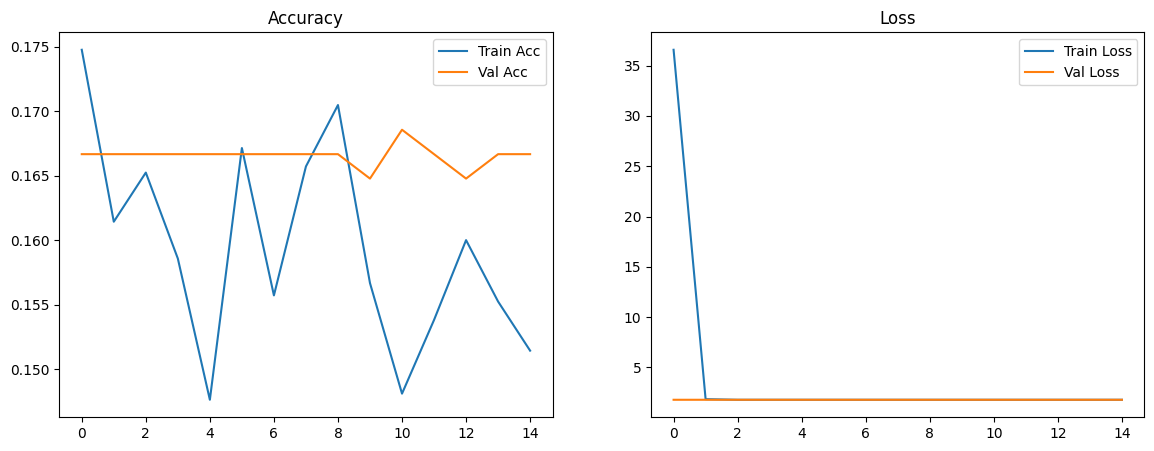

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss'); plt.legend()

plt.show()


In [ ]:
# Print final training and validation accuracy & loss
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")
print(f"Final Training Loss: {train_loss:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")


Final Training Accuracy: 0.1514
Final Validation Accuracy: 0.1667
Final Training Loss: 1.7920
Final Validation Loss: 1.7918


In [ ]:
import pandas as pd

results = pd.DataFrame({
    "Train Accuracy": [train_acc],
    "Validation Accuracy": [val_acc],
    "Train Loss": [train_loss],
    "Validation Loss": [val_loss],
})

results


,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,0.151429,0.166667,1.792009,1.791761


In [ ]:
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: "
          f"Train Acc={history.history['accuracy'][i]:.4f}, "
          f"Val Acc={history.history['val_accuracy'][i]:.4f}, "
          f"Train Loss={history.history['loss'][i]:.4f}, "
          f"Val Loss={history.history['val_loss'][i]:.4f}")


Epoch 1: Train Acc=0.1748, Val Acc=0.1667, Train Loss=36.5650, Val Loss=1.7918
Epoch 2: Train Acc=0.1614, Val Acc=0.1667, Train Loss=1.8536, Val Loss=1.7918
Epoch 3: Train Acc=0.1652, Val Acc=0.1667, Train Loss=1.7918, Val Loss=1.7918
Epoch 4: Train Acc=0.1586, Val Acc=0.1667, Train Loss=1.7925, Val Loss=1.7918
Epoch 5: Train Acc=0.1476, Val Acc=0.1667, Train Loss=1.7920, Val Loss=1.7918
Epoch 6: Train Acc=0.1671, Val Acc=0.1667, Train Loss=1.7919, Val Loss=1.7918
Epoch 7: Train Acc=0.1557, Val Acc=0.1667, Train Loss=1.7919, Val Loss=1.7918
Epoch 8: Train Acc=0.1657, Val Acc=0.1667, Train Loss=1.7919, Val Loss=1.7918
Epoch 9: Train Acc=0.1705, Val Acc=0.1667, Train Loss=1.7919, Val Loss=1.7918
Epoch 10: Train Acc=0.1567, Val Acc=0.1648, Train Loss=1.7919, Val Loss=1.7918
Epoch 11: Train Acc=0.1481, Val Acc=0.1686, Train Loss=1.7919, Val Loss=1.7918
Epoch 12: Train Acc=0.1538, Val Acc=0.1667, Train Loss=1.7919, Val Loss=1.7918
Epoch 13: Train Acc=0.1600, Val Acc=0.1648, Train Loss=1.791

In [ ]:
model.save("/content/rice_leaf_ann_model.h5")
print("Model saved successfully!")


Model saved successfully!
